# DataScience X Logistic Regression

In [2]:
import pandas as pd
import numpy as np
from matplotlib import colors as clr, pyplot as plt

## Read dataset from 'datasets/dataset_test.csv' file :

In [3]:
data = pd.read_csv('../datasets/dataset_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          400 non-null    int64  
 1   Hogwarts House                 0 non-null      float64
 2   First Name                     400 non-null    object 
 3   Last Name                      400 non-null    object 
 4   Birthday                       400 non-null    object 
 5   Best Hand                      400 non-null    object 
 6   Arithmancy                     387 non-null    float64
 7   Astronomy                      387 non-null    float64
 8   Herbology                      389 non-null    float64
 9   Defense Against the Dark Arts  392 non-null    float64
 10  Divination                     394 non-null    float64
 11  Muggle Studies                 390 non-null    float64
 12  Ancient Runes                  392 non-null    flo

In [4]:
data

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,NaN,Rico,Sargent,2001-10-06,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,NaN,Tamara,Shackelford,1998-01-08,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,NaN,Staci,Crandall,1998-09-15,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,NaN,Dee,Gavin,2001-05-10,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,NaN,Gregory,Gustafson,1999-02-01,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,NaN,Maria,Kidwell,1999-02-06,Left,45857.0,-554.181932,-5.647655,5.541819,-3.799,-591.764651,392.973420,7.048482,1047.648405,10.408749,1.882786,-248.39978,-94.89
396,396,NaN,Frederic,Koonce,1997-11-11,Left,51842.0,632.233530,6.754862,-6.322335,3.294,-221.848397,319.360250,3.921402,1035.681313,-0.169741,-1.074303,-246.87982,-15.53
397,397,NaN,Eugene,Peralta,1998-11-14,Right,61982.0,292.108738,5.234530,-2.921087,4.230,-787.036050,433.259967,3.898160,1069.794110,6.495579,-2.286537,-244.01333,1.25
398,398,NaN,Allan,Bentley,1998-10-13,Left,56020.0,-726.418553,6.735582,7.264186,3.908,511.960762,613.391514,7.244499,1042.058804,7.554259,-0.788817,-228.24290,-18.27


In [5]:
# Get numerical data from the dataframe only
data_numeric = data.select_dtypes(include=[np.number])
courses = data_numeric.dropna(axis=1, how='all')
forbidden = courses.describe()
forbidden

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,400.000000,387.000000,387.000000,389.000000,392.000000,394.000000,390.000000,392.000000,389.000000,389.000000,390.000000,392.000000,400.000000,400.000000
mean,199.500000,50088.971576,48.155326,1.385517,-0.537843,3.411071,-220.169594,495.937543,2.829816,1030.885777,5.776860,0.022985,-243.181109,23.367450
std,115.614301,15472.748364,512.537781,5.055295,5.118762,3.891192,497.668782,101.657418,4.317209,45.346899,3.217625,1.019005,8.727190,95.185944
min,0.000000,4536.000000,-802.725180,-9.687662,-8.700635,-8.183000,-1041.323658,319.360250,-7.189090,906.932050,-1.162060,-2.871119,-259.866780,-143.520000
25%,99.750000,40167.500000,-483.719690,-4.183731,-5.209348,3.528750,-580.049325,400.719831,2.227669,1028.499974,3.230372,-0.646285,-250.150987,-38.475000
50%,199.500000,49238.000000,292.108738,3.630490,-2.915654,4.703000,-407.549022,484.102477,4.290164,1047.648405,5.731330,0.059416,-244.758710,-2.555000
75%,299.250000,60157.000000,508.713093,5.405685,4.785055,5.571000,221.387925,591.372101,5.662488,1060.367924,8.136907,0.711248,-232.798160,45.332500
max,399.000000,99744.000000,870.063498,9.678462,8.027252,8.604000,939.317135,667.674165,10.366995,1099.966073,13.390013,3.205525,-226.003820,282.430000


### histogram.py

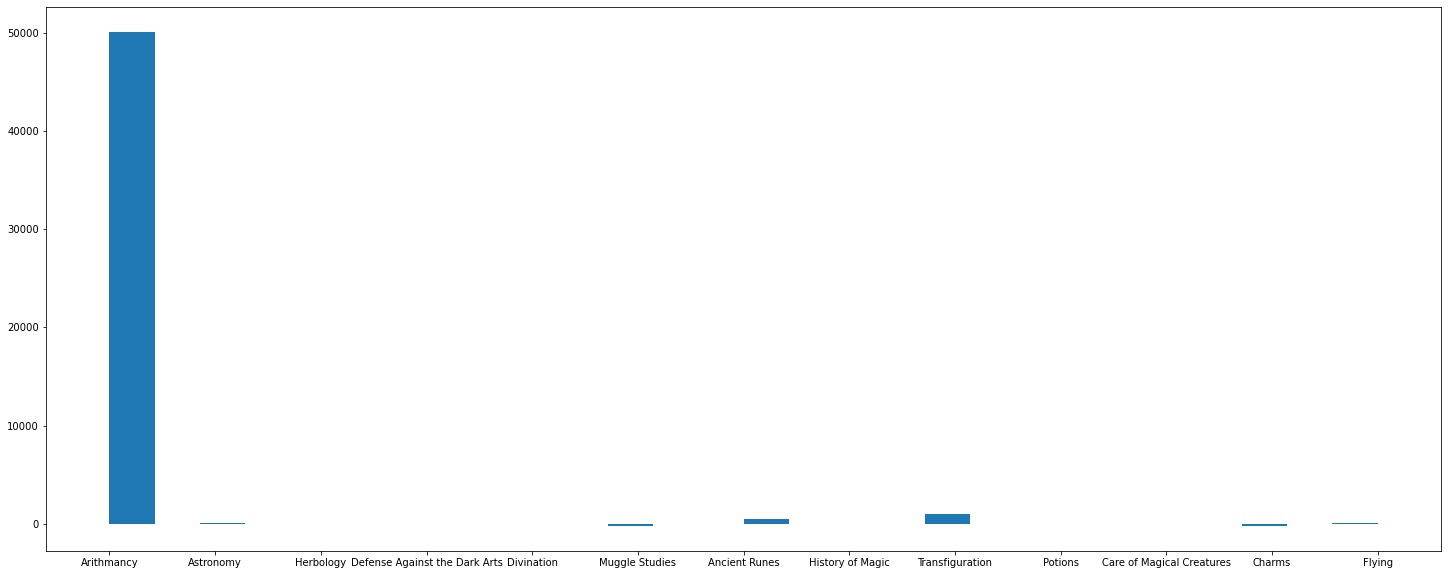

In [34]:
plt.figure(figsize=(25,10))
plt.hist(x=forbidden.loc[:, forbidden.columns != 'Index'].columns,
         weights = forbidden.loc['mean', forbidden.columns != 'Index'],
         label='this',
        bins= 14 * 2)
plt.show()

# len(forbidden.loc[:, forbidden.columns != 'Index'])